# Hypothesis Testing

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.contingency_tables import mcnemar

## 1️⃣ One-Sample Z-Test (Proportion Example)

Test if CTR = 8%.

Z-statistic: 1.0231402322579177 p-value: 0.3062415469720413


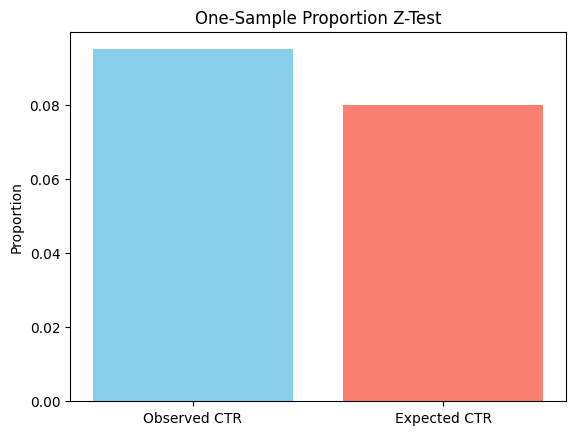

In [14]:
# Data
n = 400
successes = 38
p0 = 0.08

stat, pval = proportions_ztest(count=successes, nobs=n, value=p0)

print("Z-statistic:", stat, "p-value:", pval)

# Visualization
observed = successes / n
plt.bar(["Observed CTR", "Expected CTR"], [observed, p0], color=["skyblue", "salmon"])
plt.title("One-Sample Proportion Z-Test")
plt.ylabel("Proportion")
plt.show()

## 2️⃣ One-Sample T-Test (Mean Example)

Test if mean sprint time = 10.

T-statistic: 0.0 p-value: 1.0


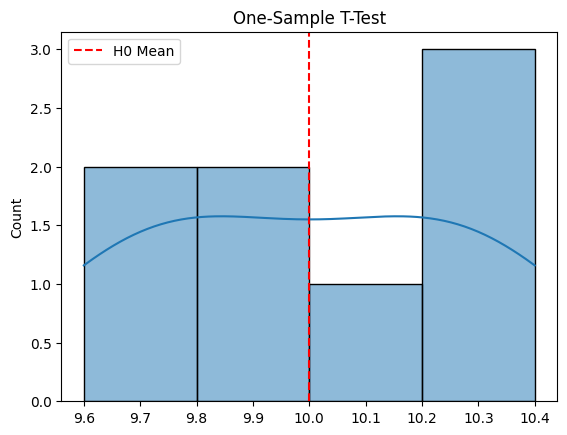

In [15]:
# Data
times = [9.8, 10.1, 9.7, 10.3, 9.9, 10.2, 9.6, 10.4]
stat, pval = stats.ttest_1samp(times, 10)

print("T-statistic:", stat, "p-value:", pval)

# Visualization
sns.histplot(times, kde=True)
plt.axvline(10, color="red", linestyle="--", label="H0 Mean")
plt.legend()
plt.title("One-Sample T-Test")
plt.show()

## 3️⃣ Two-Sample Independent T-Test

Compare group A vs B means.

T-statistic: -1.035703885509666 p-value: 0.3046393103662474


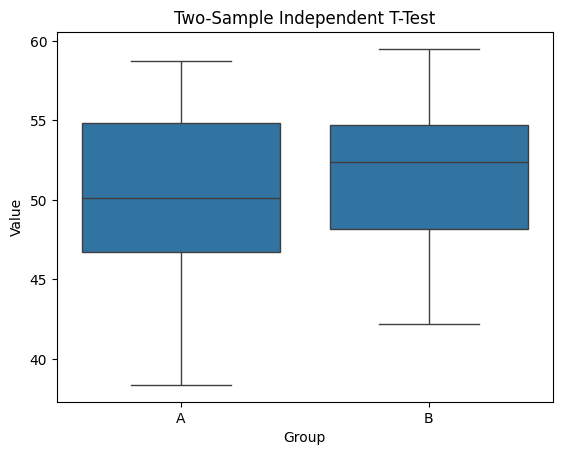

In [16]:
group_a = np.random.normal(50, 5, 30)
group_b = np.random.normal(52, 5, 30)

stat, pval = stats.ttest_ind(group_a, group_b)

print("T-statistic:", stat, "p-value:", pval)

# Visualization
df = pd.DataFrame({"Value": np.concatenate([group_a, group_b]),
                   "Group": ["A"]*30 + ["B"]*30})

sns.boxplot(data=df, x="Group", y="Value")
plt.title("Two-Sample Independent T-Test")
plt.show()

## 4️⃣ Paired T-Test

Before vs after treatment.

T-statistic: 3.1666666666666665 p-value: 0.03396614445768253


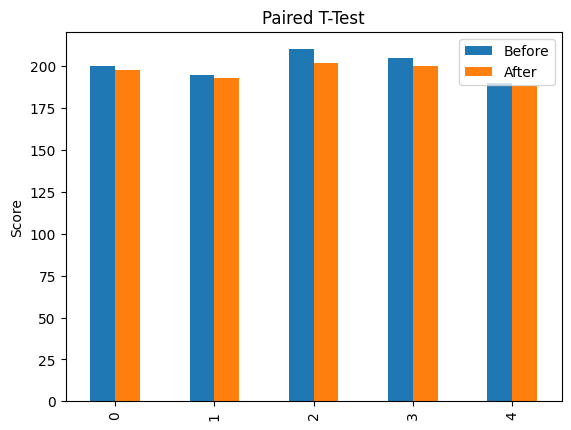

In [17]:
before = np.array([200, 195, 210, 205, 190])
after = np.array([198, 193, 202, 200, 188])

stat, pval = stats.ttest_rel(before, after)

print("T-statistic:", stat, "p-value:", pval)

# Visualization
df = pd.DataFrame({"Before": before, "After": after})
df.plot(kind="bar")
plt.title("Paired T-Test")
plt.ylabel("Score")
plt.show()

## 5️⃣ Two-Sample Proportion Z-Test

Compare conversion rates of A/B test.

Z-statistic: -0.8099368451891321 p-value: 0.4179764741282782


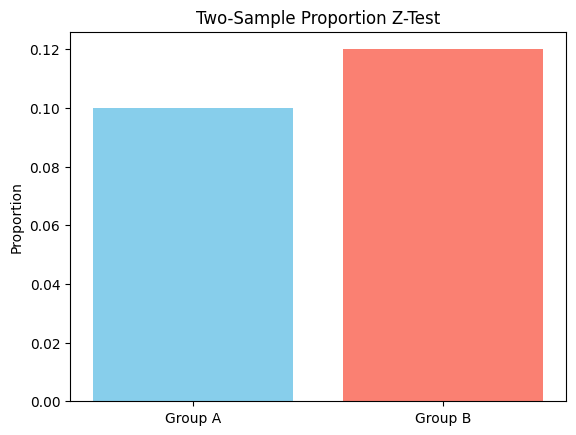

In [18]:
successes = np.array([30, 42])
samples = np.array([300, 350])

stat, pval = proportions_ztest(successes, samples)

print("Z-statistic:", stat, "p-value:", pval)

# Visualization
props = successes / samples
plt.bar(["Group A", "Group B"], props, color=["skyblue", "salmon"])
plt.title("Two-Sample Proportion Z-Test")
plt.ylabel("Proportion")
plt.show()

# 6️⃣ Chi-Square Test for Independence

Gender vs Product Choice.

Chi2: 0.6464646464646464 p-value: 0.4213795037428696 df: 1


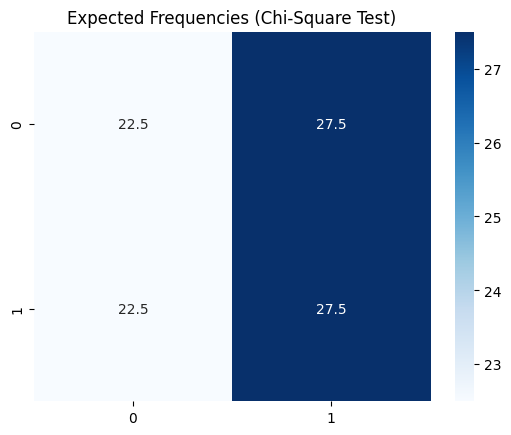

In [19]:
data = [[20, 30], [25, 25]]  # rows=Gender, cols=Product
chi2, pval, dof, expected = stats.chi2_contingency(data)

print("Chi2:", chi2, "p-value:", pval, "df:", dof)

# Visualization
sns.heatmap(expected, annot=True, fmt=".1f", cmap="Blues")
plt.title("Expected Frequencies (Chi-Square Test)")
plt.show()

# 7️⃣ McNemar’s Test

Before vs After program.

Chi2: 0.16666666666666666 p-value: 0.6830913983096086


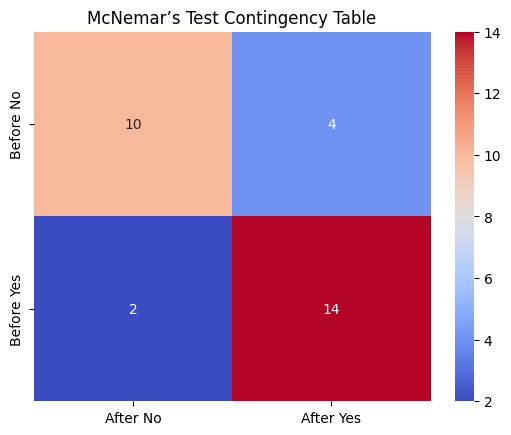

In [20]:
table = [[10, 4],
         [2, 14]]  # b=4, c=2

result = mcnemar(table, exact=False, correction=True)

print("Chi2:", result.statistic, "p-value:", result.pvalue)

# Visualization
df = pd.DataFrame(table, columns=["After No", "After Yes"], index=["Before No", "Before Yes"])
sns.heatmap(df, annot=True, cmap="coolwarm", fmt="d")
plt.title("McNemar’s Test Contingency Table")
plt.show()

## 8️⃣ One-Way ANOVA

Math vs CS vs History scores.

F-statistic: 20.333333333333314 p-value: 0.0004589852517263547


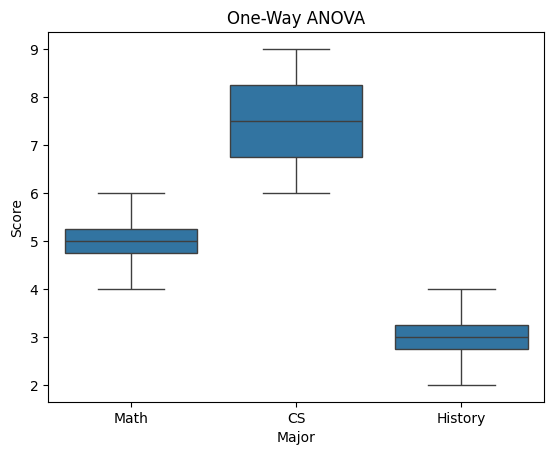

In [21]:
math = [5, 6, 4, 5]
cs = [8, 7, 9, 6]
history = [3, 4, 2, 3]

stat, pval = stats.f_oneway(math, cs, history)

print("F-statistic:", stat, "p-value:", pval)

# Visualization
df = pd.DataFrame({"Score": math+cs+history,
                   "Major": ["Math"]*4 + ["CS"]*4 + ["History"]*4})

sns.boxplot(data=df, x="Major", y="Score")
plt.title("One-Way ANOVA")
plt.show()

# 9️⃣ Two-Way ANOVA

Effect of teaching method & gender.

                     sum_sq   df         F    PR(>F)
C(Method)             1.125  1.0  0.062937  0.814273
C(Gender)            91.125  1.0  5.097902  0.086887
C(Method):C(Gender)   1.125  1.0  0.062937  0.814273
Residual             71.500  4.0       NaN       NaN


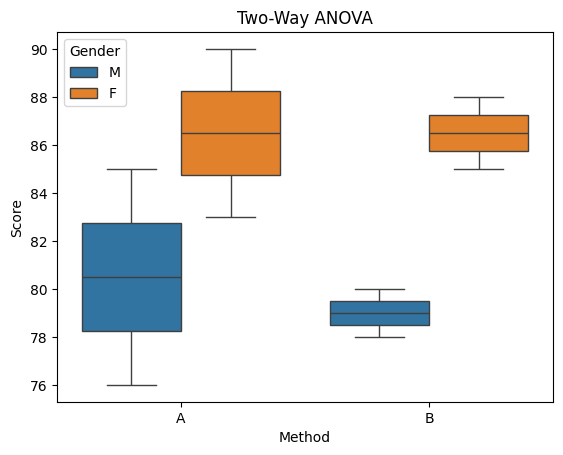

In [22]:
df = pd.DataFrame({
    "Score": [85, 90, 78, 88, 76, 83, 80, 85],
    "Method": ["A","A","B","B","A","A","B","B"],
    "Gender": ["M","F","M","F","M","F","M","F"]
})

model = ols("Score ~ C(Method) + C(Gender) + C(Method):C(Gender)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Visualization
sns.boxplot(data=df, x="Method", y="Score", hue="Gender")
plt.title("Two-Way ANOVA")
plt.show()